# Project 4: Data Wrangling
### by Omar BOUGACHA

## Introduction 

The dataset that we work on in this project (wrangle, analyze, and visualize) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.



Let's start by importing some of the most needed libraries for this project

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1: Data Gathering.

In this step, we use the several techniques for the data gathering. We have three data files to get: 
* the twitter_archive_enhanced.csv manually, 
* the image_predictions.tsv programmatically, and 
* the Twitter archive using the Tweepy API.

At each gathering point, the used techniques may need some extra libraries that are included when needed. 

### Manual Technique: 

The manual technique consists in downloading the intended file add it to the project directory then simply read it into a dataframe using Pandas. 

I have already downloaded the 'twitter_archive_enhanced.csv' file. Let's read it into a dataframe and check it.

In [2]:
twitter_archive_df = pd.read_csv('Data/twitter_archive_enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Gathering Data Programmatically:

Here, we gather the data by downloading it programmatically using the request module. We get the data from the url 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' save it to a TSV file: 'image_predictions.tsv' then load it into a dataframe using Pandas.

In [4]:
import requests

In [5]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [6]:
with open('Output_Data/image_predictions.tsv','wb') as file:
    file.write(response.content)

Let's read the file and check if our technique worked.

In [7]:
image_pred_df = pd.read_csv('Output_Data/image_predictions.tsv', sep='\t')
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### The API Technique

Here, we use the Tweepy API to gather the Twitter archive of the #WeRateDogs tweets. 

In [8]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

- Tweepy is the API of Twitter that will allows us to get the data.
- OAuthHandler to set the username password etc.. 
- json to encode and decode the data structure as a json table.
- timeit to measure the execution time of the code. 

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

The above code allows to set the account access. Then, establish the connection with the API using the authentification data.

From the twitter_archive_df we have to get the list of the tweets Ids. So we can retrieve them using the API. 

In [9]:
tweets_id = twitter_archive_df['tweet_id'].values
len(tweets_id)

2356

In [ ]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('Output_Data/tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Above is the code used to retrieve the tweets and stock them into a txt file. 

For each tweet_id in the list, we get the tweet data by using the api.get_status, then write the obtained data into the output file tweet_json.txt and add a new line. This code is wrapped in a try except structure to handle the exceptions that could be generated by the tweepy API access. 

### Json structure handling: 

Once we get all the tweets in the txt file we have to read these json tables and extract the useful information into a pandas dataframe. In the follwing, I use the io (stringIO) and the json modules to do this work. 

In [10]:
import json
from io import StringIO

Let's see an example of one line to identify what information we want to get. 

In [11]:
with open('Output_Data/tweet_json.txt','r') as file:
    line = file.readline()
    io_line = StringIO(line)
    json_table = json.load(io_line)
    print(json.dumps(json_table, indent=4))

{
    "created_at": "Tue Aug 01 16:23:56 +0000 2017",
    "id": 892420643555336193,
    "id_str": "892420643555336193",
    "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
    "truncated": false,
    "display_text_range": [
        0,
        85
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [],
        "urls": [],
        "media": [
            {
                "id": 892420639486877696,
                "id_str": "892420639486877696",
                "indices": [
                    86,
                    109
                ],
                "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "url": "https://t.co/MgUWQ76dJU",
                "display_url": "pic.twitter.com/MgUWQ76dJU",
                "expanded_url": "https://twitter.com/dog_rat

Since we are interested in the tweet itself, we can get the following data: 
- 'id' the tweet's id
- 'place' this could contain the localisation of the post.
- 'is_quote_status' to see if it's a quoted from other tweets
- 'retweet_count' number of times the post has been retweeted
- 'favorite_count' how many liked the tweet.
- 'favorited' Indicates whether this Tweet has been liked by the authenticating user
- 'retweeted' whether this Tweet has been Retweeted by the authenticating user.

Further information about the tweet structure could be found [here](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object).

To transform this into a dataframe we start by creating an empty list that will contain dictionnaries with these keys. 

In [13]:
data = []
with open('Output_Data/tweet_json.txt','r') as file:
    Lines = file.readlines() 
    for line in Lines:
        d = {}
        io_line = StringIO(line)
        json_table = json.load(io_line)
        d['tweet_id'] = json_table['id_str']
        print(d['tweet_id'])
        if(json_table['place']==None):
            d['place'] = 'Not_mentioned'
            d['country'] = 'Not_mentioned'
        else : 
            d['place'] = json_table['place']['full_name']
            d['country'] = json_table['place']['country']
        d['is_quote_status'] = json_table['is_quote_status']
        d['retweet_count'] = json_table['retweet_count']
        d['favorite_count'] = json_table['favorite_count']
        d['favorited'] = json_table['favorited']
        d['retweeted'] = json_table['retweeted']
        data.append(d)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035918850
881906580714

704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345688576
700796979434098688
700747788515020802
700518061187723268
700505138482569216
700462010979500032
700167517596164096
700151421916807169
700143752053182464
700062718104

In [14]:
len(data)

2354

In [15]:
tweets_json_df = pd.DataFrame(data)
tweets_json_df.head()

,tweet_id,place,country,is_quote_status,retweet_count,favorite_count,favorited,retweeted
0,892420643555336193,Not_mentioned,Not_mentioned,False,8853,39467,False,False
1,892177421306343426,Not_mentioned,Not_mentioned,False,6514,33819,False,False
2,891815181378084864,Not_mentioned,Not_mentioned,False,4328,25461,False,False
3,891689557279858688,Not_mentioned,Not_mentioned,False,8964,42908,False,False
4,891327558926688256,Not_mentioned,Not_mentioned,False,9774,41048,False,False


With this we have finished the gathering part of this project. Let's go on to the data assessment part.

## Step 2: Data Assessment

Here, we assess the data quality and tidiness. We detect the issues and we document them. So that in the next step, we can treat each of these issues. Each dataframe is assessed alone.

### twitter_archive_df
#### Quality assessement:
Let's start with the twitter_archive_df's quality assessment.

In [16]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


When looking at the this dataframe we can already detect several issues: 
- clearly alot of columns present missing data: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'. These are detected visually, there are maybe other columns with missing data.
- the source column has the source of the tweet defined in a weird format. 

Let's dive deeper in this assessment. 
##### Missing data

In [17]:
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

So we have: 
- 2278 missing value in the 'in_reply_to_status_id'
- 2278 missing value in the 'in_reply_to_reply_id'
- 2175 missing value in the 'retweeted_status_id'
- 2175 missing value in the 'retweeted_status_user_id'
- 2175 missing value in the 'retweeted_status_timestamp'
- 59 missing value in the 'expanded_urls'

##### Accuracy
I found in the internet that the wrong datatype could be considered as an accuracy issue. Since the definition of accuracy is that the data values must be the *right value* represented in a *consistent* and *unambiguous* form. 

Let's check the datatypes for this dataframe.

In [18]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Here is a list of the issues found in the dataframe: 
- The 'in_reply_to_status_id' and 'in_reply_to_user_id' should be integers since they hold the id of the original status and the user id of the original status. 
- timestamp should be a datetime type.
- 'retweeted_status_id' and 'retweeted_status_user_id' should be integers since they hold ids. 
- 'retweeted_status_timestamp' should also be transformed to datetime type.

I have said before that the source column requires some further investigations. Let's take a closer look. 

In [19]:
twitter_archive_df.ix[0,4]

/home/omar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/omar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [20]:
twitter_archive_df['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [21]:
twitter_archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

It seems to me that this variable is miss represented as a string in that form. I think this is an accuracy issue also. I would say that this is a categorical variable (should be represented with categorical data type). And the values should be ('Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', and 'TweetDeck').

Let's check the dog names.

In [22]:
twitter_archive_df['name'].unique().tolist()

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 '

We can see in this list we have alot of anomalies like: 'a', 'mad', 'an', 'O', 'my', 'his', 'this', 'all', 'old', 'the', 'by', 'officially', 'life', 'light', and 'space' 

All these are inaccurate names and thus should be replaced.

##### Uniqueness 

Let's check for duplicated records. 

In [23]:
twitter_archive_df.duplicated().sum()

0

In [24]:
twitter_archive_df['tweet_id'].nunique(), twitter_archive_df.shape[0]

(2356, 2356)

We have no duplicated records. 

#### Tidiness Issues: 

Let's assess the tidiness issues for this dataframe. I recall that for a dataframe to be tidy it must satisfy 3 conditions: 
* Each variable is a column 
* Each observation is a row 
* Each type of observational unit forms a table.

In [25]:
twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


Visually, we can see that each observation is a row. However, each row presents the data of the tweet but it also presents some data about the dog of the tweet. This is a first issue of tidiness:
* The twitter_archive_df presents the tweet informations and the dog information

Another visual issue here, is the last 4 columns of the data 'doggo', 'floofer', 'pupper', and 'puppo'. It seems to me that these columns present the category (if I might say) of the dog in the picture. It seems like:
* the category of the dog is presented in 4 columns. 

#### Assessment Report: 

To summarize, here are the issues detected in the twitter_archive_df:
* Data Quality:
    - 2278 missing value in the 'in_reply_to_status_id'
    - 2278 missing value in the 'in_reply_to_reply_id'
    - 2175 missing value in the 'retweeted_status_id'
    - 2175 missing value in the 'retweeted_status_user_id'
    - 2175 missing value in the 'retweeted_status_timestamp'
    - 59 missing value in the 'expanded_urls'
    - The 'in_reply_to_status_id' and 'in_reply_to_user_id' should be integers since they hold the id of the original status and the user id of the original status. 
    - timestamp should be a datetime type.
    - 'retweeted_status_id' and 'retweeted_status_user_id' should be integers since they hold ids. 
    - 'retweeted_status_timestamp' should also be transformed to datetime type.
    - Source should be a categorical variable (should be represented with categorical data type). And the values should be ('Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', and 'TweetDeck').
    - Several anomalies in the name column should be fixed.
* Data Tidiness:
    - The stage of the dog is presented in 4 columns. 
    - The twitter_archive_df presents the tweets' information and the dogs' information

### image_pred_df
#### Quality assessement:
Let's start with the image_pred_df's quality assessment.

In [26]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Visually no data quality issues are apperent. Let's dive deep into the dataframe assessement.

##### Missing Data

In [27]:
image_pred_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

The dataframe does not present any missing data. 

In [28]:
image_pred_df.shape[0], twitter_archive_df.shape[0]

(2075, 2356)

In [29]:
2356-2075

281

However, we can see that this table present only 2075 entries from the total of 2356 entries in the twitter_archive_df. Which implies 281 missing records.

In [30]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Accuracy:
As accuracy issues, we can considered that the type for the predictions should be presented as a categorical type and not a string. 

##### Uniqueness:

In [31]:
image_pred_df['tweet_id'].nunique(), image_pred_df.shape[0]

(2075, 2075)

In [32]:
image_pred_df.duplicated().sum()

0

We can see we have no duplicated data entries.

#### Assessment Report: 

To summarize, here are the issues detected in the image_pred_df:
* Data Quality:
    - 2075 records of a total of 2356 tweet. This implies 281 missing record. 
    - I think the type for p1, p2, and p3 should be categorical.
    

### tweets_json_df
#### Quality assessement:
Let's start with the tweets_json_df's quality assessment.

In [33]:
tweets_json_df.head(2)

,tweet_id,place,country,is_quote_status,retweet_count,favorite_count,favorited,retweeted
0,892420643555336193,Not_mentioned,Not_mentioned,False,8853,39467,False,False
1,892177421306343426,Not_mentioned,Not_mentioned,False,6514,33819,False,False


##### Missing Values

In [34]:
tweets_json_df.isnull().sum()

tweet_id           0
place              0
country            0
is_quote_status    0
retweet_count      0
favorite_count     0
favorited          0
retweeted          0
dtype: int64

In [35]:
tweets_json_df.shape[0], twitter_archive_df.shape[0]

(2354, 2356)

In [36]:
2356-2354

2

As we can see the tweets_json_df has only 2354 records of 2356 total records. This implies that there are 2 missing records. 

##### Accuracy

In [37]:
tweets_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
tweet_id           2354 non-null object
place              2354 non-null object
country            2354 non-null object
is_quote_status    2354 non-null bool
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
favorited          2354 non-null bool
retweeted          2354 non-null bool
dtypes: bool(3), int64(2), object(3)
memory usage: 99.0+ KB


When creating this dataframe I delibaretly choose to use the 'str_id' of the tweet structure. In this twitter website they said it is safer to use this attribute. This made the tweet_id as a string object. Therefore, the type of tweet_id should be changed to integer. 

##### Uniqueness

In [38]:
tweets_json_df.shape[0], tweets_json_df['tweet_id'].nunique()

(2354, 2354)

In [39]:
tweets_json_df.duplicated().sum()

0

The dataframe has no duplicated values.

In [40]:
tweets_json_df['place'].value_counts()

Not_mentioned    2353
Clifton, NJ         1
Name: place, dtype: int64

In [41]:
tweets_json_df['country'].value_counts()

Not_mentioned    2353
United States       1
Name: country, dtype: int64

In [42]:
tweets_json_df['favorited'].value_counts()

False    2346
True        8
Name: favorited, dtype: int64

In [43]:
tweets_json_df['retweeted'].value_counts()

False    2354
Name: retweeted, dtype: int64

In [44]:
tweets_json_df['is_quote_status'].value_counts()

False    2323
True       31
Name: is_quote_status, dtype: int64

#### Assessment Report: 

To summarize, here are the issues detected in the tweets_json_df:
* Data Quality:
    - 2354 records of a total of 2356 tweet. This implies 2 missing record. 
    - tweet_id should be of integer type.

### General Tidiness Issue: 
We have some tidiness issue with the total of these three tables. These three tables describe only two observational units: 
* The tweet
* The dog in the tweet

Therefore, only two tables are required to describe this data. 

## Step 3: Data Cleaning

Let's now fix the detected issues.

The **tweets_json_df**
is the table with the least problems so let's start fixing it. 

##### Define:
- Change the 'tweet_id' type from string to int using the to_numeric function


##### Code :

In [45]:
tweets_json_df['tweet_id'] = tweets_json_df['tweet_id'].apply(pd.to_numeric)
tweets_json_df.head()

,tweet_id,place,country,is_quote_status,retweet_count,favorite_count,favorited,retweeted
0,892420643555336193,Not_mentioned,Not_mentioned,False,8853,39467,False,False
1,892177421306343426,Not_mentioned,Not_mentioned,False,6514,33819,False,False
2,891815181378084864,Not_mentioned,Not_mentioned,False,4328,25461,False,False
3,891689557279858688,Not_mentioned,Not_mentioned,False,8964,42908,False,False
4,891327558926688256,Not_mentioned,Not_mentioned,False,9774,41048,False,False


##### Test:

In [46]:
tweets_json_df.dtypes

tweet_id            int64
place              object
country            object
is_quote_status      bool
retweet_count       int64
favorite_count      int64
favorited            bool
retweeted            bool
dtype: object

Good we have changed the type of the 'tweet_id'. Now this table present only 2354 records of the total 2356 records. Since I have no Tweepy API Access I will have to use only these 2354 record. I cannot fix the missing 2 records.

Since the image_pred_df is the dataframe with the lowest records and since I don't have the access the algorithms that performed the prediction of the dog type, I propose to filter all other records to keep only the tweets that have their images predicted. 
##### Define: 

- Filter the records to keep only the records presented in all three tables. 

##### Code:

In [47]:
tweets_ids = image_pred_df['tweet_id'].unique().tolist()
twitter_archive_df2 = twitter_archive_df[twitter_archive_df['tweet_id'].isin(tweets_ids)]
tweets_json_df2 = tweets_json_df[tweets_json_df['tweet_id'].isin(tweets_ids)]

##### Test:


In [48]:
twitter_archive_df2.shape[0], tweets_json_df2.shape[0], image_pred_df.shape[0]

(2075, 2073, 2075)

We still have some tweets missing between tweets_json_df2 and twitter_archive_df2. Let's fix this problem
##### Code:

In [49]:
tweets_ids = tweets_json_df2['tweet_id'].unique().tolist()
twitter_archive_df2 = twitter_archive_df2[twitter_archive_df2['tweet_id'].isin(tweets_ids)]
image_pred_df2 = image_pred_df[image_pred_df['tweet_id'].isin(tweets_ids)]

In [50]:
twitter_archive_df2.reset_index(drop=True,inplace=True)
image_pred_df2.reset_index(drop=True,inplace=True)
tweets_json_df2.reset_index(drop=True,inplace=True)

##### Test

In [51]:
twitter_archive_df2.shape[0], tweets_json_df2.shape[0], image_pred_df2.shape[0]

(2073, 2073, 2073)

Now all the tables have the same number of records. Let's fix the other issues. 

#### Missing Values of table Twitter_archive_df2

In the Twitter_archive_df we found alot of missing values:
- 2278 missing value in the 'in_reply_to_status_id'
- 2278 missing value in the 'in_reply_to_reply_id'
- 2175 missing value in the 'retweeted_status_id'
- 2175 missing value in the 'retweeted_status_user_id'
- 2175 missing value in the 'retweeted_status_timestamp'
- 59 missing value in the 'expanded_urls'

Let's recheck the number of missing values now. 

In [52]:
twitter_archive_df2.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2050
in_reply_to_user_id           2050
timestamp                        0
source                           0
text                             0
retweeted_status_id           1994
retweeted_status_user_id      1994
retweeted_status_timestamp    1994
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

When we filtered the records to keep only those who appear in all three tables. We solved the problem of the missing 59 values of the 'expended_url'.

Now let's solve the problem of the other attributes: 
- For in_reply_to_status_id and in_reply_to_user_id these two attributes are only valid if the tweet is a reply to another status. 
- For retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp these attributes are only valid if the tweet is retweeted. 

Both attributes have very large missing data. And I think they wouldn't provide extra information. Therefore, I propose to: 
##### Define: 
- Create a new boolean feature 'is_reply' to describe if the tweet is a reply. 
- Create a new boolean feature 'is_retweeted' to describe if the tweet is retweeted. 
- Drop the columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

##### Code: 

In [53]:
def isNAN(x):
    if type(x) != type('a'):
        if np.isnan(x) : 
            return True
        else :
            return False
    else : 
        return False

In [54]:
twitter_archive_df2['is_reply'] = twitter_archive_df2['in_reply_to_user_id'].apply(lambda x: False if isNAN(x) else True)
twitter_archive_df2['is_retweeted'] = twitter_archive_df2['retweeted_status_id'].apply(lambda x: False if isNAN(x) else True)
twitter_archive_df2.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                          'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test:

In [55]:
twitter_archive_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 14 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
is_reply              2073 non-null bool
is_retweeted          2073 non-null bool
dtypes: bool(2), int64(3), object(9)
memory usage: 198.5+ KB


And we have solved the missing values issue for this dataframe.

Let's fix the timestamp datatype problem: 
##### Define:
- Change the timestamp type to datetime using to_datetime pandas function.

##### Code:

In [56]:
twitter_archive_df2['timestamp'] = pd.to_datetime(twitter_archive_df2['timestamp'])

##### Test:

In [57]:
twitter_archive_df2.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
is_reply                             bool
is_retweeted                         bool
dtype: object

We have fixed this problem. 

Let's fix the source problem. 
##### Define:
- Change source values to ('Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', or 'TweetDeck')
- Change the data type to categorical

##### Code:

In [58]:
def new_val(x):
    a=''
    for elt in ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']:
        if elt in x: 
            a=elt
    return a
twitter_archive_df2['source'] = twitter_archive_df2['source'].apply(new_val)

In [59]:
twitter_archive_df2['source'] = twitter_archive_df2['source'].astype('category')

##### Test

In [60]:
twitter_archive_df2['source'].unique()

[Twitter for iPhone, Twitter Web Client, TweetDeck]
Categories (3, object): [Twitter for iPhone, Twitter Web Client, TweetDeck]

In [61]:
twitter_archive_df2.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
is_reply                             bool
is_retweeted                         bool
dtype: object

Let's solve the dog name problem. 

##### Define: 

- Change all anomalies into None. 

##### Code:

In [62]:
anomalies = ['a', 'mad', 'an', 'O', 'my', 'his', 'this', 'all', 'old', 'the', 'by', 'officially', 'life', 'light', 'space']
def fix_an(x):
    if x in anomalies:
        return 'None'
    else: 
        return x
twitter_archive_df2['name'] = twitter_archive_df2['name'].apply(fix_an)

##### Test

In [63]:
twitter_archive_df2[twitter_archive_df2['name'].isin(anomalies)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,is_reply,is_retweeted


We solved all the mentioned quality problem in this dataframe. 

Let's solve the **tidiness** problems: 
- The category of the dog is presented in 4 columns: doggo, floofer, pupper, and puppo


##### Define:
- Create a column that will define if the dog is neither a doggo, floofer, pupper, nor puppo.
- Create a category field that will define if the dog is doggo, floofer, pupper, or puppo using the melt function

##### Code:

In [64]:
def other_stage(x):
    if (x["doggo"]=='None') and (x["floofer"]=='None') and (x["pupper"]=='None') and (x["puppo"]=='None'):
        return 'No_stage'
    else :
        return 'None'

In [65]:
twitter_archive_df2['doggo'].unique()

array(['None', 'doggo'], dtype=object)

In [66]:
twitter_archive_df2['floofer'].unique()

array(['None', 'floofer'], dtype=object)

In [67]:
twitter_archive_df2['No_stage'] = twitter_archive_df2.apply(other_stage, axis=1)

In [68]:
twitter_archive_df2['No_stage'].value_counts()

No_stage    1753
None         320
Name: No_stage, dtype: int64

In [69]:
cols = ['doggo', 'floofer', 'pupper', 'puppo', 'No_stage']
id_cols=[]
for elt in twitter_archive_df2.columns:
    if elt not in cols:
        id_cols.append(elt)
twitter_archive_df2 = pd.melt(twitter_archive_df2,id_vars=id_cols, value_vars = cols, var_name = 'dog_stage')

In [70]:
index_todrop = twitter_archive_df2[twitter_archive_df2['value'].isin(['None',None])].index.tolist()

In [71]:
twitter_archive_df2.drop(index_todrop, axis=0, inplace=True)

In [72]:
twitter_archive_df2.reset_index(drop=True, inplace=True)

In [73]:
twitter_archive_df2.drop(['value'], axis=1, inplace=True)

##### Test:

In [74]:
twitter_archive_df2.shape[0]

2086

In [75]:
twitter_archive_df2['tweet_id'].duplicated().sum()

13

So we have now a 13 duplicated entries!! let's check these out! First let's get the tweet ids of the duplicated entries

In [76]:
id_dup = twitter_archive_df2[twitter_archive_df2['tweet_id'].duplicated()]['tweet_id'].tolist()

Let's check the text for the first one and see! 

In [77]:
twitter_archive_df2[twitter_archive_df2['tweet_id'].isin(id_dup)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,is_reply,is_retweeted,dog_stage
6,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,False,False,doggo
7,854010172552949760,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,False,False,doggo
34,817777686764523521,2017-01-07 16:59:28+00:00,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,False,False,doggo
39,808106460588765185,2016-12-12 00:29:28+00:00,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,False,False,doggo
40,802265048156610565,2016-11-25 21:37:47+00:00,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,True,False,doggo
41,801115127852503040,2016-11-22 17:28:25+00:00,Twitter for iPhone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,False,False,doggo
47,785639753186217984,2016-10-11 00:34:48+00:00,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,False,False,doggo
50,775898661951791106,2016-09-14 03:27:11+00:00,Twitter for iPhone,"RT @dog_rates: Like father (doggo), like son (...",https://twitter.com/dog_rates/status/733109485...,12,10,None,False,True,doggo
53,770093767776997377,2016-08-29 03:00:36+00:00,Twitter for iPhone,RT @dog_rates: This is just downright precious...,https://twitter.com/dog_rates/status/741067306...,12,10,just,False,True,doggo
57,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,False,False,doggo


We will keep these duplicates because they describe the dogs. After all we all dispatch the dogs into another table.

In [78]:
# Let's change the stage to a categorical type
twitter_archive_df2['dog_stage'] = twitter_archive_df2['dog_stage'].astype('category')

##### Test

In [79]:
twitter_archive_df2['dog_stage'].value_counts()

No_stage    1753
pupper       221
doggo         80
puppo         24
floofer        8
Name: dog_stage, dtype: int64

In [80]:
twitter_archive_df2.shape[0]

2086

As I said it's normal we have 13 duplicates we will deal with this problem when we treat the second tidiness problem: 
- The twitter_archive_df2 presents the tweet informations and the dog information

##### Define:

- Let's divide each information into a table:

##### Code: 

In [81]:
twitter_archive_df2.columns.tolist()

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'is_reply',
 'is_retweeted',
 'dog_stage']

In [82]:
tweet_info_df = twitter_archive_df2[['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
                                     'is_reply','is_retweeted']]
dog_info_df = twitter_archive_df2[['tweet_id', 'name', 'dog_stage', 'rating_numerator', 
                                   'rating_denominator']]

##### Test:

In [83]:
tweet_info_df.head()

,tweet_id,timestamp,source,text,expanded_urls,is_reply,is_retweeted
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,False,False
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,False,False
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,False,False
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,False,False
4,869596645499047938,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,False,False


In [84]:
dog_info_df.head()

,tweet_id,name,dog_stage,rating_numerator,rating_denominator
0,890240255349198849,Cassie,doggo,14,10
1,884162670584377345,Yogi,doggo,12,10
2,872967104147763200,None,doggo,12,10
3,871515927908634625,Napolean,doggo,12,10
4,869596645499047938,Scout,doggo,12,10


One more thing: when we changed fixed the first tidiness issue. We found that 13 records are duplicated. Let's fix this in the tweet_info_df. 

##### Define: 

- Drop the duplicated records of the tweet_info_df. 

##### Code:

In [85]:
duplicated_indexes = tweet_info_df[tweet_info_df.duplicated()].index.tolist()

In [86]:
tweet_info_df.drop(duplicated_indexes, axis=0, inplace=True)

/home/omar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [87]:
tweet_info_df.reset_index(drop=True, inplace=True)

##### Test:

In [88]:
tweet_info_df.duplicated().sum()

0

Let's fix the types of p1, p2, and p3 from the image_pred_df.

##### Define: 

- Change the type of p1, p2, and p3 into category

##### Code:

In [89]:
image_pred_df['p1'] = image_pred_df['p1'].astype('category')
image_pred_df['p2'] = image_pred_df['p2'].astype('category')
image_pred_df['p3'] = image_pred_df['p3'].astype('category')

##### Test:

In [90]:
image_pred_df.dtypes

tweet_id       int64
jpg_url       object
img_num        int64
p1          category
p1_conf      float64
p1_dog          bool
p2          category
p2_conf      float64
p2_dog          bool
p3          category
p3_conf      float64
p3_dog          bool
dtype: object

Let's fix the general tidiness problem: three table describe only two observational units. Now we have actually 4 tables: tweet_info_df, dog_info_df, tweets_json_df, and image_pred_df to describe two observational units; the tweets and the dogs. We have to fix this tidiness problem. 

##### Define: 

- Merge tweet_info_df and tweets_json_df into twitter_archive_master_df 
- Merge dog_info_df and image_pred_df into dog_master_df

##### Codes:

In [91]:
twitter_archive_master_df = tweet_info_df.merge(tweets_json_df, right_on='tweet_id', left_on='tweet_id')
twitter_archive_master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,is_reply,is_retweeted,place,country,is_quote_status,retweet_count,favorite_count,favorited,retweeted
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,False,False,Not_mentioned,Not_mentioned,False,7711,32467,False,False
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,False,False,Not_mentioned,Not_mentioned,False,3128,20771,False,False
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,False,False,Not_mentioned,Not_mentioned,False,5669,28031,False,False
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,False,False,Not_mentioned,Not_mentioned,False,3628,20730,False,False
4,869596645499047938,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,False,False,Not_mentioned,Not_mentioned,False,3327,16476,False,False


In [92]:
dog_master_df = dog_info_df.merge(image_pred_df, right_on='tweet_id', left_on='tweet_id')
dog_master_df.head()

,tweet_id,name,dog_stage,rating_numerator,rating_denominator,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,Cassie,doggo,14,10,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,884162670584377345,Yogi,doggo,12,10,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
2,872967104147763200,None,doggo,12,10,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
3,871515927908634625,Napolean,doggo,12,10,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
4,869596645499047938,Scout,doggo,12,10,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False


##### Test:

In [93]:
twitter_archive_master_df.shape

(2073, 14)

In [94]:
dog_master_df.shape

(2086, 16)

This is the expected result after merging the dataframes. We worked with 2073 tweet and 2086 dog record since we have 13 records that has the same tweet_id but different dog_nicknames.

Let's re-assess the new obtained dataframes.

##### Missing Data

In [95]:
twitter_archive_master_df.isnull().sum()

tweet_id           0
timestamp          0
source             0
text               0
expanded_urls      0
is_reply           0
is_retweeted       0
place              0
country            0
is_quote_status    0
retweet_count      0
favorite_count     0
favorited          0
retweeted          0
dtype: int64

In [96]:
dog_master_df.isnull().sum()

tweet_id              0
name                  0
dog_stage             0
rating_numerator      0
rating_denominator    0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
dtype: int64

##### Accuracy (datatypes)

In [97]:
twitter_archive_master_df.dtypes

tweet_id                         int64
timestamp          datetime64[ns, UTC]
source                        category
text                            object
expanded_urls                   object
is_reply                          bool
is_retweeted                      bool
place                           object
country                         object
is_quote_status                   bool
retweet_count                    int64
favorite_count                   int64
favorited                         bool
retweeted                         bool
dtype: object

In [98]:
dog_master_df.dtypes

tweet_id                 int64
name                    object
dog_stage             category
rating_numerator         int64
rating_denominator       int64
jpg_url                 object
img_num                  int64
p1                    category
p1_conf                float64
p1_dog                    bool
p2                    category
p2_conf                float64
p2_dog                    bool
p3                    category
p3_conf                float64
p3_dog                    bool
dtype: object

##### Uniqueness

In [99]:
twitter_archive_master_df.duplicated().sum()

0

In [100]:
dog_master_df.duplicated().sum()

0

## Step 3: Storing the clean tidy data.

Several possibilities are presented to save the data. In this project I save the data into the csv format and into an sqlite database.

### CSV files

In [101]:
twitter_archive_master_df.to_csv('Output_Data/twitter_archive_master.csv', index=False)

In [102]:
dog_master_df.to_csv('Output_Data/dog_tweets_data.csv',index=False)

### SQLite Database

In [103]:
from sqlalchemy import create_engine

In [104]:
engine = create_engine('sqlite:///weratedog_data.db')

In [105]:
twitter_archive_master_df.to_sql('twitter_archive_master', engine, index=False)

In [106]:
dog_master_df.to_sql('dog_tweet_data', engine, index=False)

In [107]:
engine.dispose()

## Master Data Analysis

Now we have two tidy and clean dataframes let's analyze them. 

### Twitter Archive Master.

In [108]:
twitter_archive_master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,is_reply,is_retweeted,place,country,is_quote_status,retweet_count,favorite_count,favorited,retweeted
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,False,False,Not_mentioned,Not_mentioned,False,7711,32467,False,False
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,False,False,Not_mentioned,Not_mentioned,False,3128,20771,False,False
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,False,False,Not_mentioned,Not_mentioned,False,5669,28031,False,False
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,False,False,Not_mentioned,Not_mentioned,False,3628,20730,False,False
4,869596645499047938,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,False,False,Not_mentioned,Not_mentioned,False,3327,16476,False,False


Let's explore the histogramms of the retweets count and the favorites count.

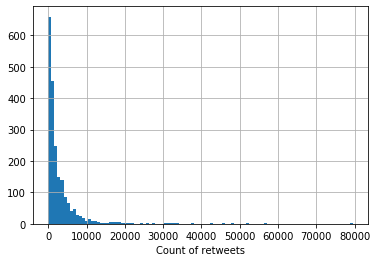

In [109]:
twitter_archive_master_df['retweet_count'].hist(bins=100)
plt.xlabel('Count of retweets')
plt.show()

We can notice that the retweet counts is highly skewed to the right. 

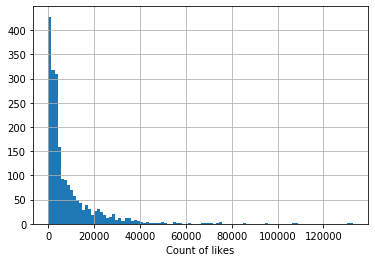

In [110]:
twitter_archive_master_df['favorite_count'].hist(bins=100)
plt.xlabel('Count of likes')
plt.show()

We can notice that the likes count is highly skewed to the right. 

Are these two variables correlated? 

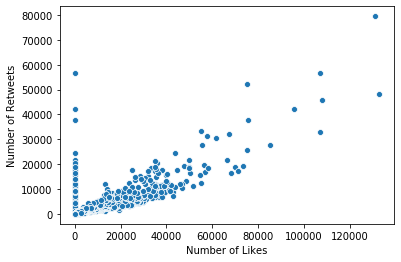

In [111]:
sns.scatterplot(x='favorite_count',y='retweet_count',data = twitter_archive_master_df)
plt.xlabel('Number of Likes')
plt.ylabel('Number of Retweets')
plt.show()

The obtained results are quite logical. The high the number of likes reflects that people like this post. Which means that they are more likely to retweet the picture. However, we can see that a large number of twitter posts have zero likes and yet they are retweeted largely. Is this a problem in the data wrangling process? 

In [112]:
twitter_archive_master_df['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

### Dog Master.

In [113]:
dog_master_df.head()

,tweet_id,name,dog_stage,rating_numerator,rating_denominator,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,Cassie,doggo,14,10,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,884162670584377345,Yogi,doggo,12,10,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
2,872967104147763200,None,doggo,12,10,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
3,871515927908634625,Napolean,doggo,12,10,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
4,869596645499047938,Scout,doggo,12,10,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False


In [114]:
dog_master_df.groupby(['dog_stage'])['rating_numerator'].mean()

dog_stage
No_stage    12.470051
doggo       11.862500
floofer     11.875000
pupper      10.773756
puppo       12.041667
Name: rating_numerator, dtype: float64

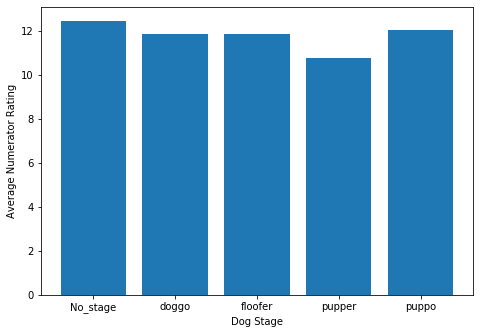

In [115]:
bar_data = dog_master_df.groupby(['dog_stage'])['rating_numerator'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bar_data.index, bar_data.values)
plt.xlabel('Dog Stage')
plt.ylabel('Average Numerator Rating')
plt.show()

In [116]:
dog_master_df['rating_numerator'].describe()

count    2086.000000
mean       12.259827
std        40.573214
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [117]:
dog_master_df[dog_master_df['rating_numerator']>15]

,tweet_id,name,dog_stage,rating_numerator,rating_denominator,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
135,778027034220126208,Sophie,pupper,27,10,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
618,820690176645140481,None,No_stage,84,70,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
671,810984652412424192,Sam,No_stage,24,7,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
794,786709082849828864,Logan,No_stage,75,10,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
945,758467244762497024,None,No_stage,165,150,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
994,749981277374128128,Atticus,No_stage,1776,10,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
1090,731156023742988288,None,No_stage,204,170,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
1151,716439118184652801,Bluebert,No_stage,50,50,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1171,713900603437621249,None,No_stage,99,90,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
1194,710658690886586372,None,No_stage,80,80,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True


As we can see the numerator rating are quite subjective. Plus, the denominator is not the same for all the dogs. This makes the comparison between the numerator ratings is not quite fair. Therefore, I propose to add a feature that will contain the fraction of rating_numerator by the rating_denominator.

In [118]:
def rating(x):
    return x['rating_numerator']/x['rating_denominator']

In [119]:
dog_master_df['rating'] = dog_master_df.apply(rating,axis=1)

Let's investigate the histogram of the new feature.

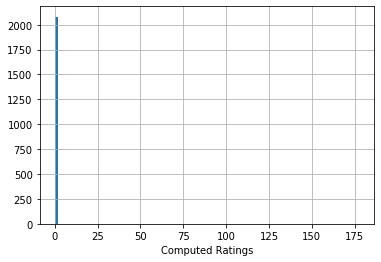

In [120]:
dog_master_df['rating'].hist(bins=100)
plt.xlabel('Computed Ratings')
plt.show()

we still have a problem with the ratings very big values...

In [121]:
dog_master_df['rating'].describe()

count    2086.000000
mean        1.169743
std         3.976457
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

Let's zoom in the histogram and take a closer look.

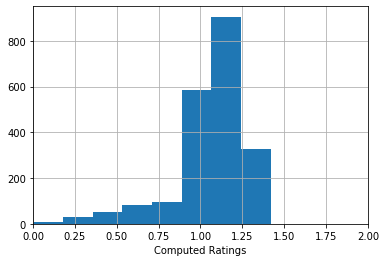

In [122]:
dog_master_df['rating'].hist(bins=1000)
plt.xlabel('Computed Ratings')
plt.xlim((0,2))
plt.show()

Let's bar plot the dog stage now on the mean of computed ratings

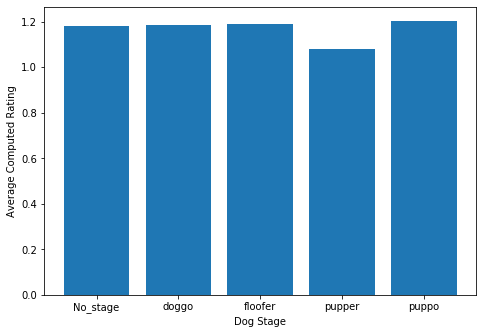

In [123]:
bar_data_2 = dog_master_df.groupby(['dog_stage'])['rating'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bar_data_2.index, bar_data_2.values)
plt.xlabel('Dog Stage')
plt.ylabel('Average Computed Rating')
plt.show()

We can see that now the results changed:
- Puppos is now the highly rated stage instead of the no stage dogs
- pupper is always the lowest rated stage. 

But, we can see that the mean rating is always above 100%. 

In [124]:
merged = dog_master_df.merge(twitter_archive_master_df, right_on="tweet_id",
                            left_on='tweet_id')

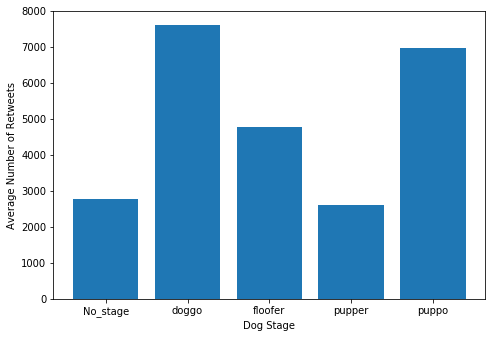

In [125]:
bar_retweet = merged.groupby(['dog_stage'])['retweet_count'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bar_retweet.index, bar_retweet.values)
plt.xlabel('Dog Stage')
plt.ylabel('Average Number of Retweets')
plt.show()

Doggo is the stage having the highest average of retweets. Puppo is the next stage. Still we have pupper with the lowest average number of retweets. 

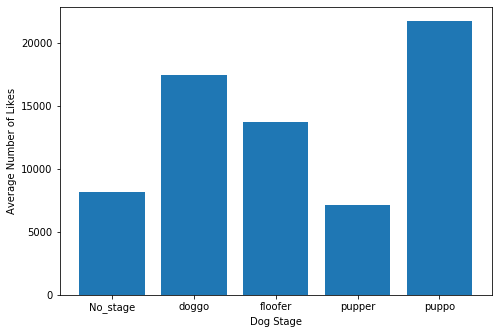

In [126]:
bar_retweet = merged.groupby(['dog_stage'])['favorite_count'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bar_retweet.index, bar_retweet.values)
plt.xlabel('Dog Stage')
plt.ylabel('Average Number of Likes')
plt.show()

In this case, puppo and doggo are still the two stages with the highest averages. But, it's the other way around between them. Puppo is the one with the highest average number of likes. Doggo is the second in the rating. However, pupper is always at last.